## Clustering in "Two moons" dataset

The aim is to cluster the "two moons" dataset imported from sklearn.datasets. We will apply different clustering algorithms like K-means, DB-Scan and Spectral Clustering to cluster the data and understand the pros and cons of using them. The dataset contains *n_samples* data points and each data point consists of two features.

## Importing Libraries

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.1)

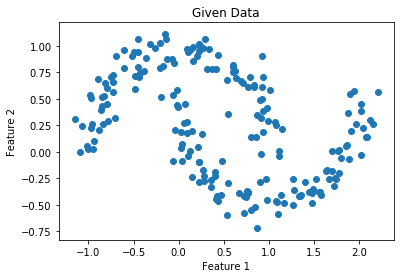

In [131]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Given Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Pre-processing

In [132]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

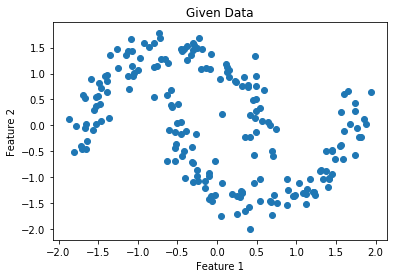

In [133]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Given Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Actual Clusters

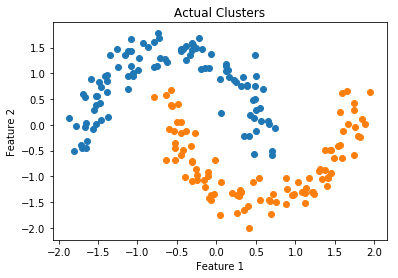

In [134]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.title("Actual Clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Clustering by K-means

K-means is the most popular clustering algorithm. In this algorithm, initially we decide the *number of clusters*, say *k*,  and then we randomly choose k-centroids. Then, we label all the data points to these k-centroids depending on the closeness of the points to the centroids (here, closeness is a measure of distance which could be Euclidean, Manhattan or any other distance). So, we get k-clusters after labelling. Then, we find the new centroids. The new centroids are the centroids of the k-clusters we obtained from labelling. 

In the "Two Moon" dataset, we are not able to properly cluster the data points. This is because K-means is capable of clustering **ellipsoidal clusters**. Since, the two moon data set contains "two-moon shaped" data so we could not properly cluster the data using K-means.

(200,)


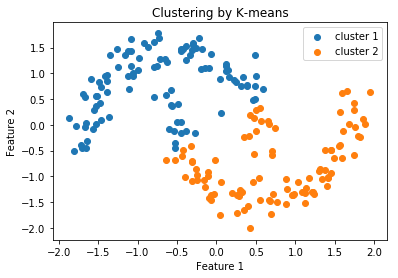

In [135]:
from sklearn.cluster import KMeans
k = 2    # number of clusters
model = KMeans(n_clusters=k)
y_pred = model.fit_predict(X)
print(y_pred.shape)
for i in range(k) :
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], label = 'cluster '+str(i+1))
plt.title('Clustering by K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Clustering by DB-Scan

We have used **DB-SCAN** with parameter *eps = 0.30* (maximum distance between two points) and *min_samples = 4* (minimun number of points required to be classified as core point). We have seen that K-means could not cluster the two moon dataset properly but DB-Scan is able to cluster the dataset into two clusters. Since, the data points are very closed to each other, so we need to keep *eps* very low and vary *min_samples* in a way the two clusters are seperated.

### Pros :

One good thing about **DB-SCAN** is that we don't have to give "no. of clusters", instead it is able to find it on its own.
It is also able to cluster non-ellipsoidal data unlike K-means.

### Cons :

We also have observed that **DB-SCAN** is very sensitive to change in the value of *eps* (and also *min_samples* to some extent). Although, **DB-SCAN** is able to predict the two moons shape but it is still not a suitable technique to be used for higher dimension as it becomes more difficult to choose parameter *eps* and *min_samples* in higher dimension.

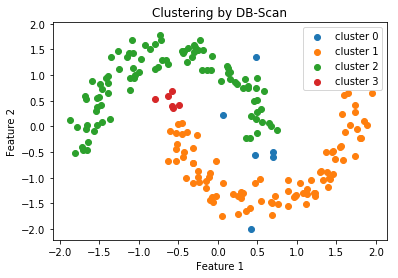

In [136]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.30, min_samples=4)
y_pred = dbscan.fit_predict(X)

for i in sorted(set(y_pred)) :
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], label = "cluster " + str(i+1))
plt.title("Clustering by DB-Scan")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Spectral Clustering

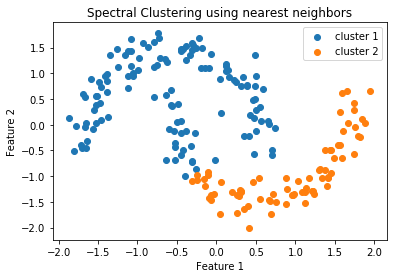

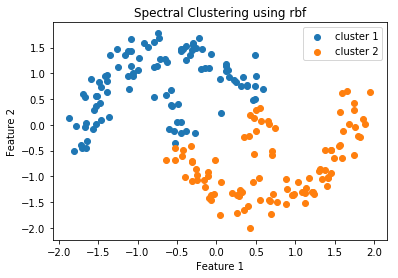

In [137]:
from sklearn.cluster import SpectralClustering
spectral_model = SpectralClustering(n_clusters=2, affinity="nearest_neighbors", n_neighbors=10, random_state=42)
y_pred = spectral_model.fit_predict(X)
for i in sorted(set(y_pred)) :
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], label = "cluster " + str(i+1))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Spectral Clustering using nearest neighbors")
plt.legend()
plt.show()

spectral_model = SpectralClustering(n_clusters=2, affinity="rbf", gamma=0.8, random_state=42)
y_pred = spectral_model.fit_predict(X)
for i in sorted(set(y_pred)) :
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], label = "cluster " + str(i+1))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Spectral Clustering using rbf")
plt.legend()
plt.show()